# Zadatak 1.

U prilogu vježbe nalazi se funkcija 5.1. koja služi za generiranje umjetnih podataka kako bi se demonstriralo grupiranje
podataka. Funkcija prima cijeli broj koji definira željeni broju uzoraka u skupu i cijeli broj (od 1 do 5) koji definira na
koji način će se generirati podaci, a vraća generirani skup podataka u obliku numpy polja pri čemu su prvi i drugi stupac
vrijednosti prve odnosno druge ulazne veličine za svaki podatak.

In [1]:
from sklearn import datasets
import numpy as np

def generate_data(n_samples, flagc):
    
    if flagc == 1:
        random_state = 365
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        
    elif flagc == 2:
        random_state = 148
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
        X = np.dot(X, transformation)
        
    elif flagc == 3:
        random_state = 148
        # X, y = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5, 3.0], random_state=random_state)
        X, y = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

    elif flagc == 4:
        X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
        
    elif flagc == 5:
        X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
    
    else:
        X = []
        
    return X

Generirajte 500 podataka i prikažite ih na slici. 

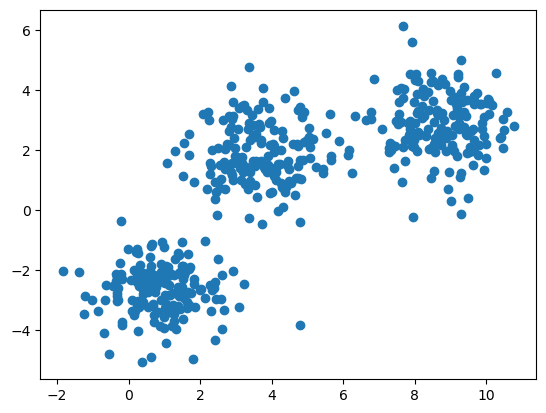

In [2]:
import matplotlib.pyplot as plt

data = generate_data(500, 1)

plt.scatter(data[:,0], data[:,1])

Pomoću scikit-learn ugrađene metode za kmeans odredite centre klastera
te svaki podatak obojite ovisno o njegovoj pripadnosti pojedinom klasteru (grupi). Nekoliko puta pokrenite napisani
kod. Što primjećujete? Što se događa ako mijenjate način kako se generiraju podaci?

Scikit learn centers:  [1]
[[ 8.74570381  2.85880153]
 [ 0.90432871 -2.65519353]
 [ 3.68603225  1.85947866]]
Scikit learn centers:  [2]
[[-0.04478871  0.78201734]
 [ 3.92549361 -7.22473722]
 [-0.46889019 -3.11954435]]
Scikit learn centers:  [3]
[[-7.02153507 -8.62565531]
 [ 1.44086113  2.07042038]
 [ 1.41247525 -7.2976408 ]]
Scikit learn centers:  [4]
[[-0.53841677  0.29616393]
 [ 0.02539409 -0.63264534]
 [ 0.54541525  0.30903054]]
Scikit learn centers:  [5]
[[ 1.5984988  -0.15475495]
 [-0.52200211  0.67980993]
 [ 0.5238505   0.20402954]]


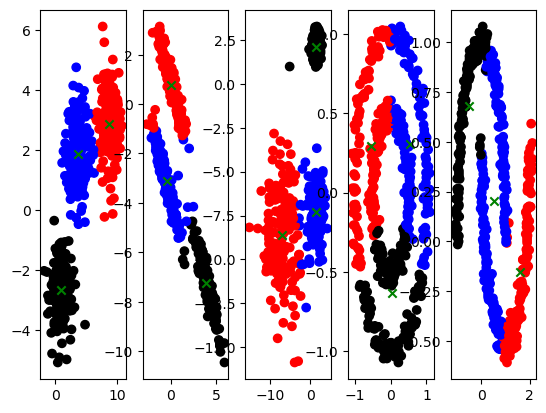

In [3]:
from sklearn.cluster import KMeans

fig, ax = plt.subplots(1,5)
plt.rcParams['figure.figsize'] = [25, 20]



for i in range(1,6):
    data = generate_data(500, i)
    n, m = np.shape(data)
    K = 3

    model = KMeans(n_clusters=K, n_init=20, max_iter=10)
    model.fit(data)

    centers = model.cluster_centers_
    labels = model.labels_

    print("============================")
    print("Scikit learn centers: ", [i])
    print(centers)

    LABEL_COLOR_MAP = { 0 : 'r',
                        1 : 'k',
                        2 : 'b'
                        }
    
    label_color = [LABEL_COLOR_MAP[l] for l in labels]

    ax[i-1].scatter(data[:,0], data[:,1], c=label_color)
    ax[i-1].scatter(centers[:,0], centers[:,1], color='g', marker='x')


Promjenom načina generiranja koda mijenja se i centar grupa.

# Zadatak 2.

Scikit-learn kmeans metoda vraća i vrijednost kriterijske funkcije (5-3). Za broj klastera od 1 do 20 odredite vrijednost
kriterijske funkcije za podatke iz Zadatka 1. Prikažite dobivene vrijednosti pri čemu je na x-osi broj klastera (npr. od 2
do 20), a na y-osi vrijednost kriterijske funkcije. Kako komentirate dobivene rezultate? Kako biste pomoću dobivenog
grafa odredili optimalni broj klastera?

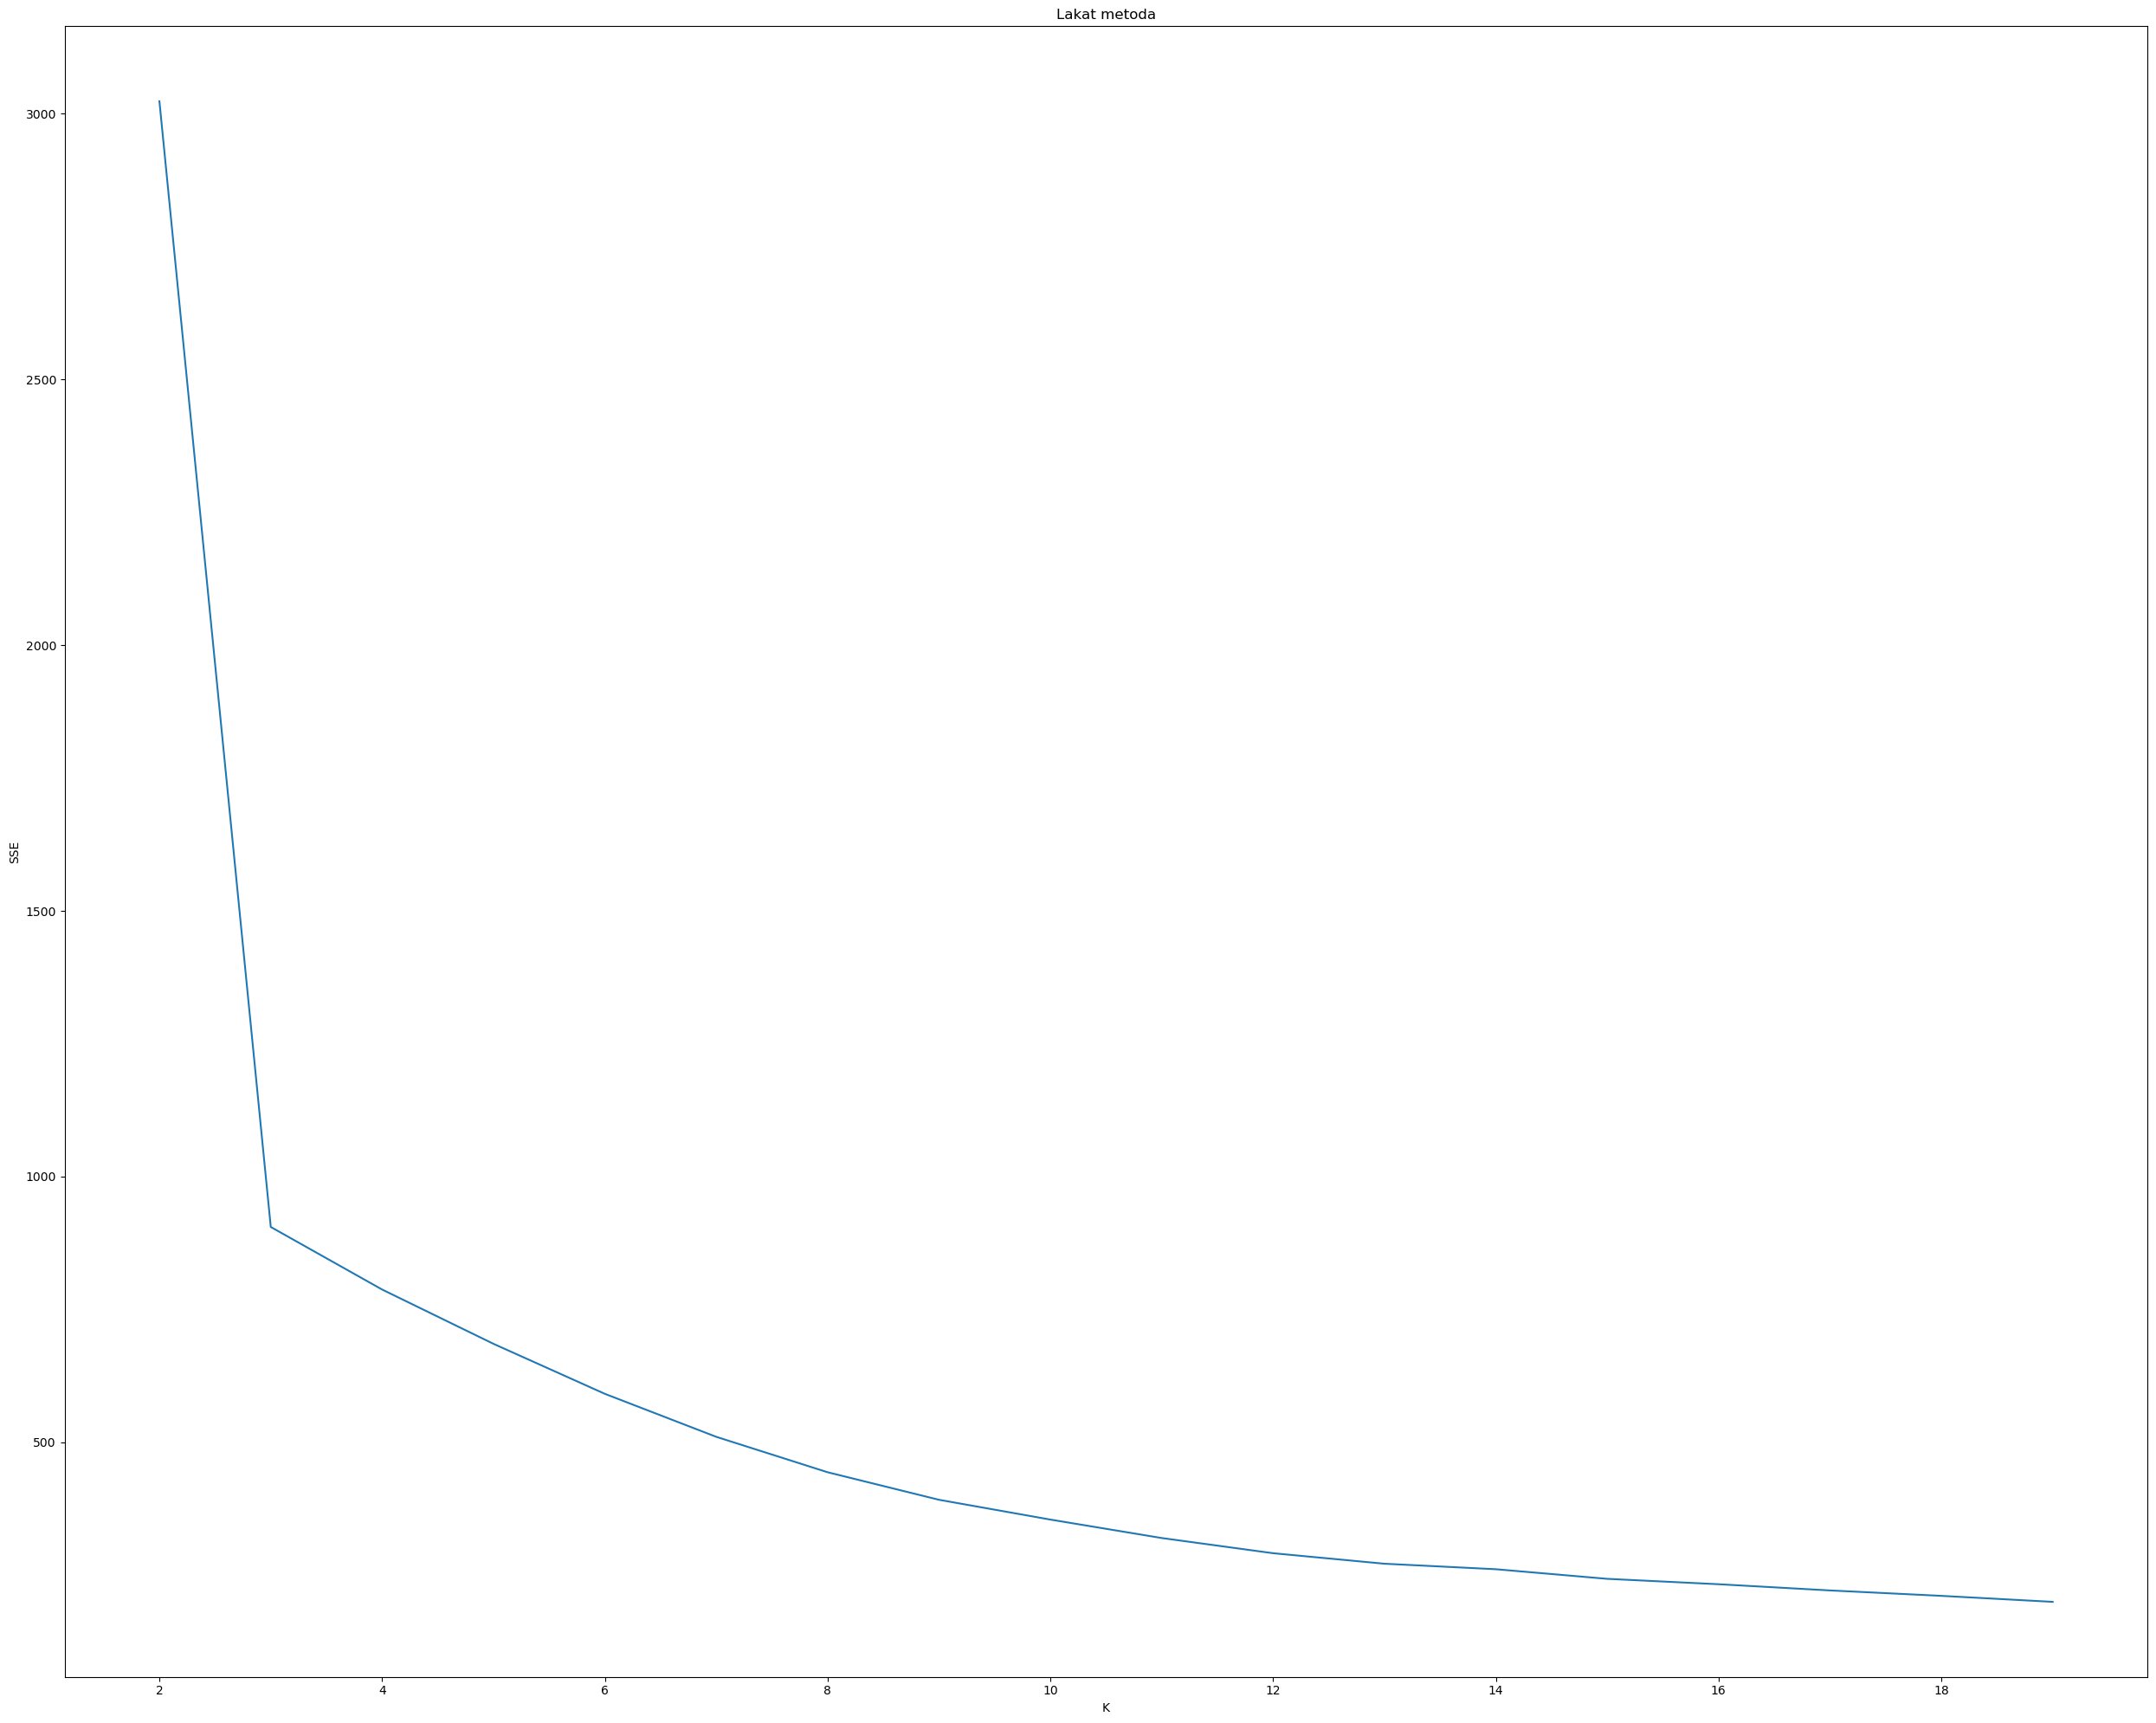

In [4]:
from matplotlib.ticker import MaxNLocator

plt.rcParams['figure.figsize'] = [25, 20]

data = generate_data(500,1)

SSE_kmeans = []        
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    SSE_kmeans.append(kmeans.inertia_) 

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(range(2, 20), SSE_kmeans)
plt.title("Lakat metoda")
plt.xlabel("K")
plt.ylabel("SSE")
plt.tight_layout()
plt.show()

Možemo uočiti kako je najveći pad SSE kad se koriste 3 clustera, time možemo zaključiti da je optimalna količina clustera 3 za grupaciju ovih podataka.

# Zadatak 3.

Primijenite hijerarhijsko grupiranje na podatke korištene u Zadatku 1 pomoću funkcije `linkage` koja je ugrađena scipy
metoda za *agglomerative clustering*:

`from scipy.cluster.hierarchy import dendrogram, linkage`

Prikažite pripadni `dendogram`. Mijenjajte korištenu metodu (argument method). Kako komentirate postignute rezultate?

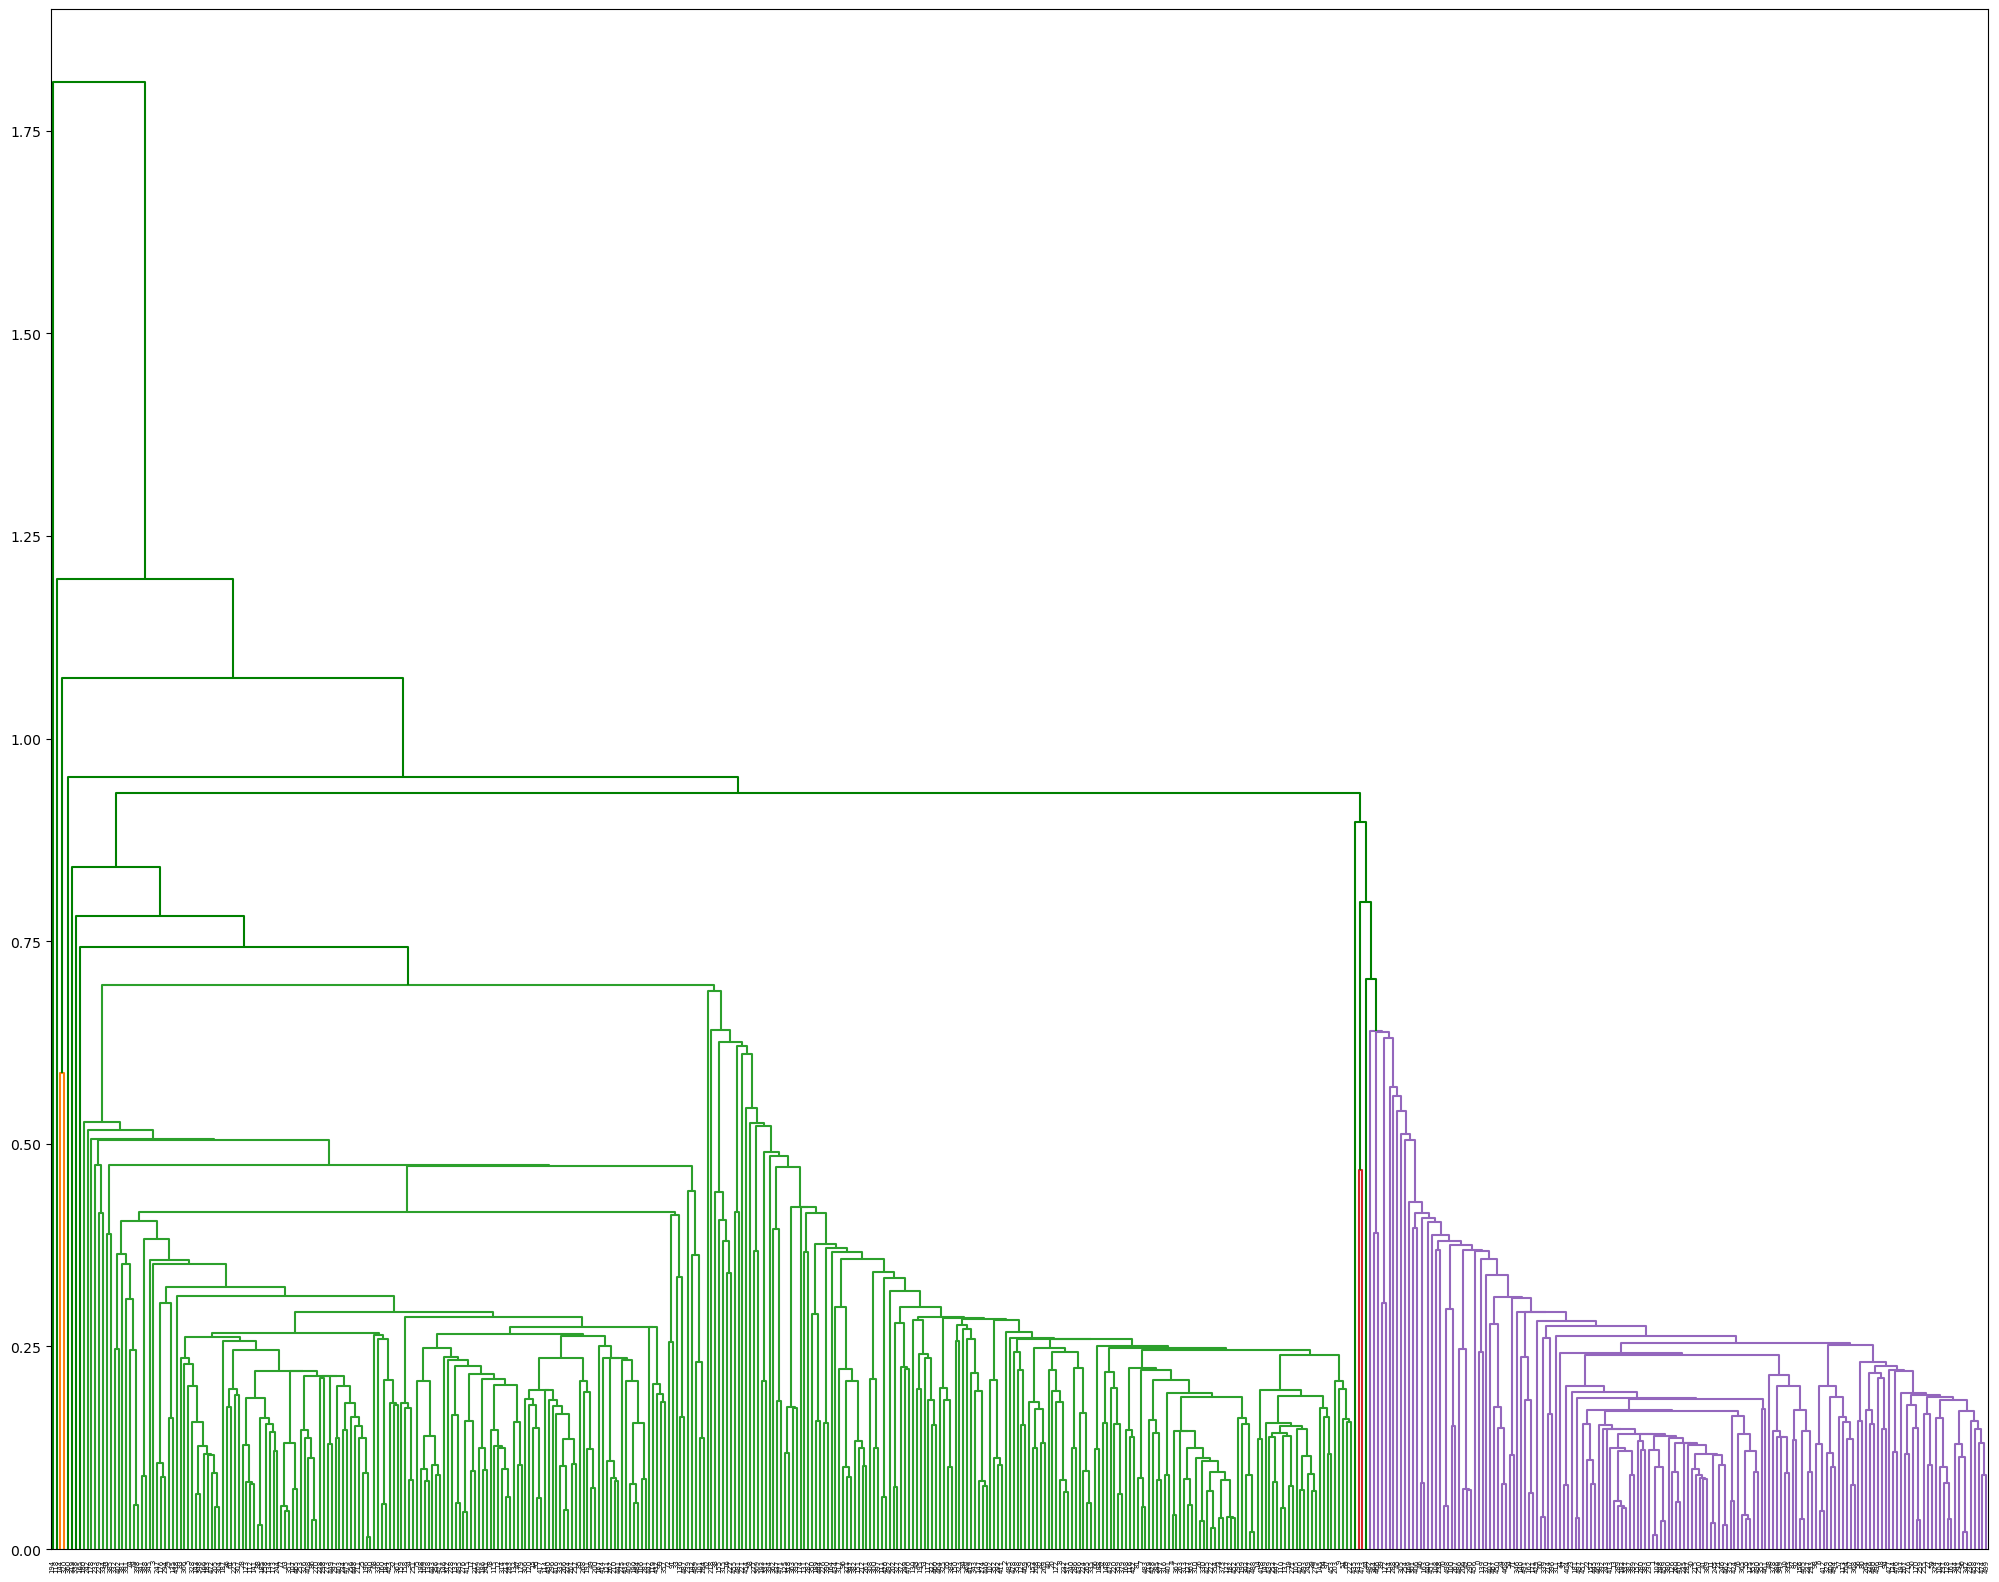

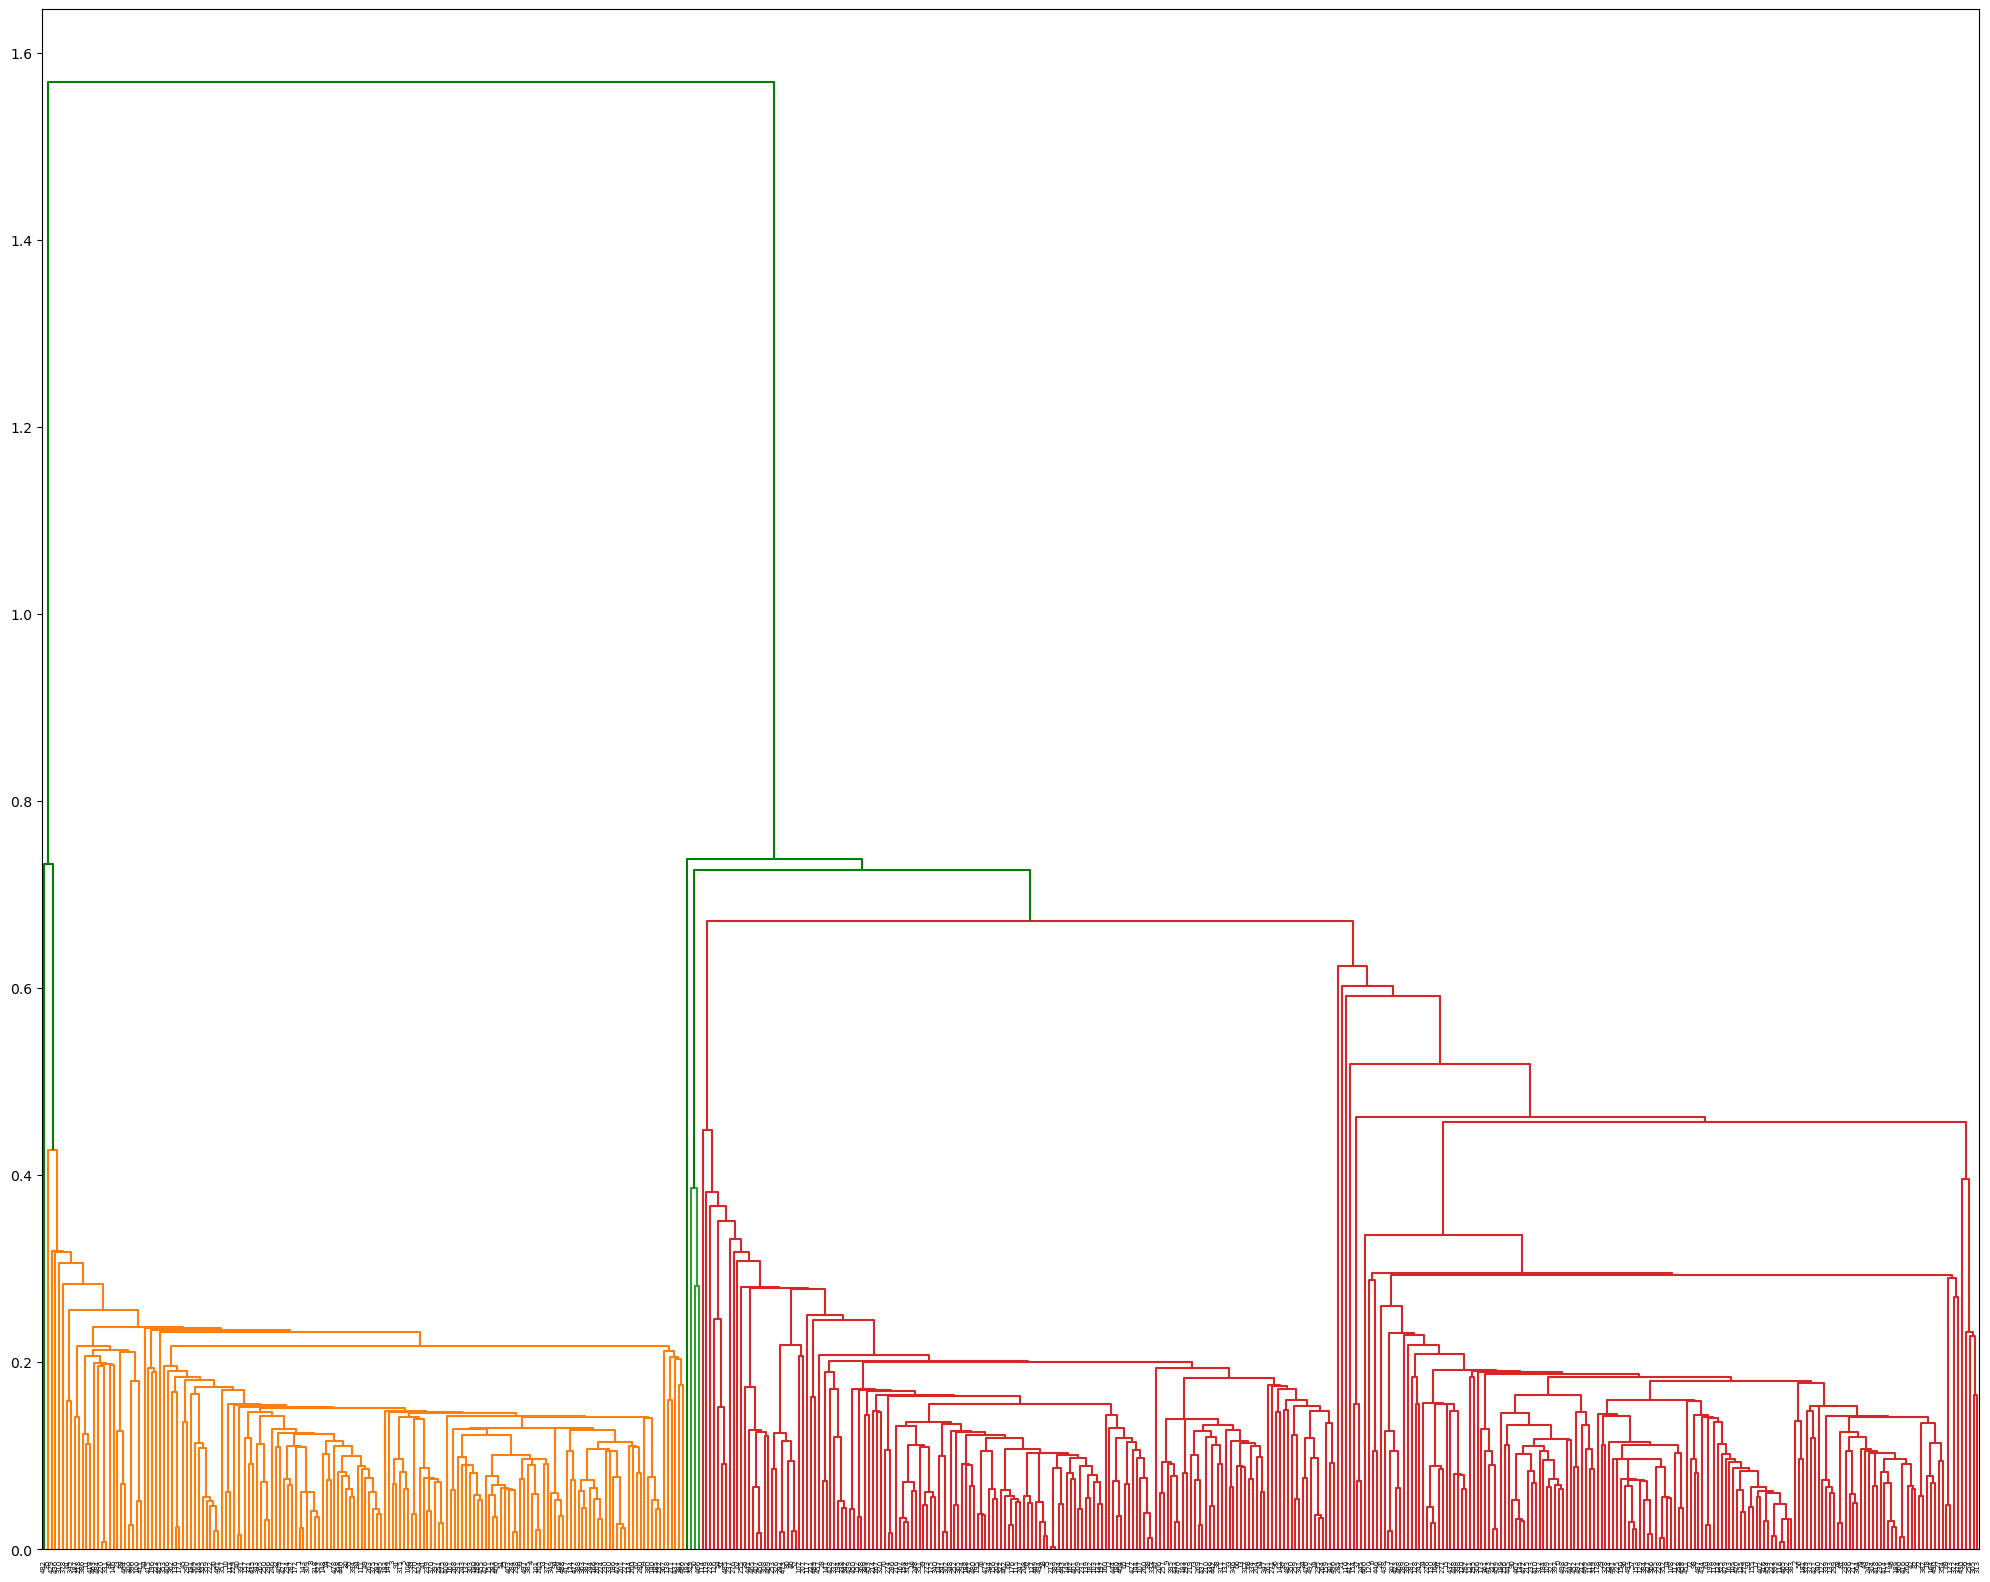

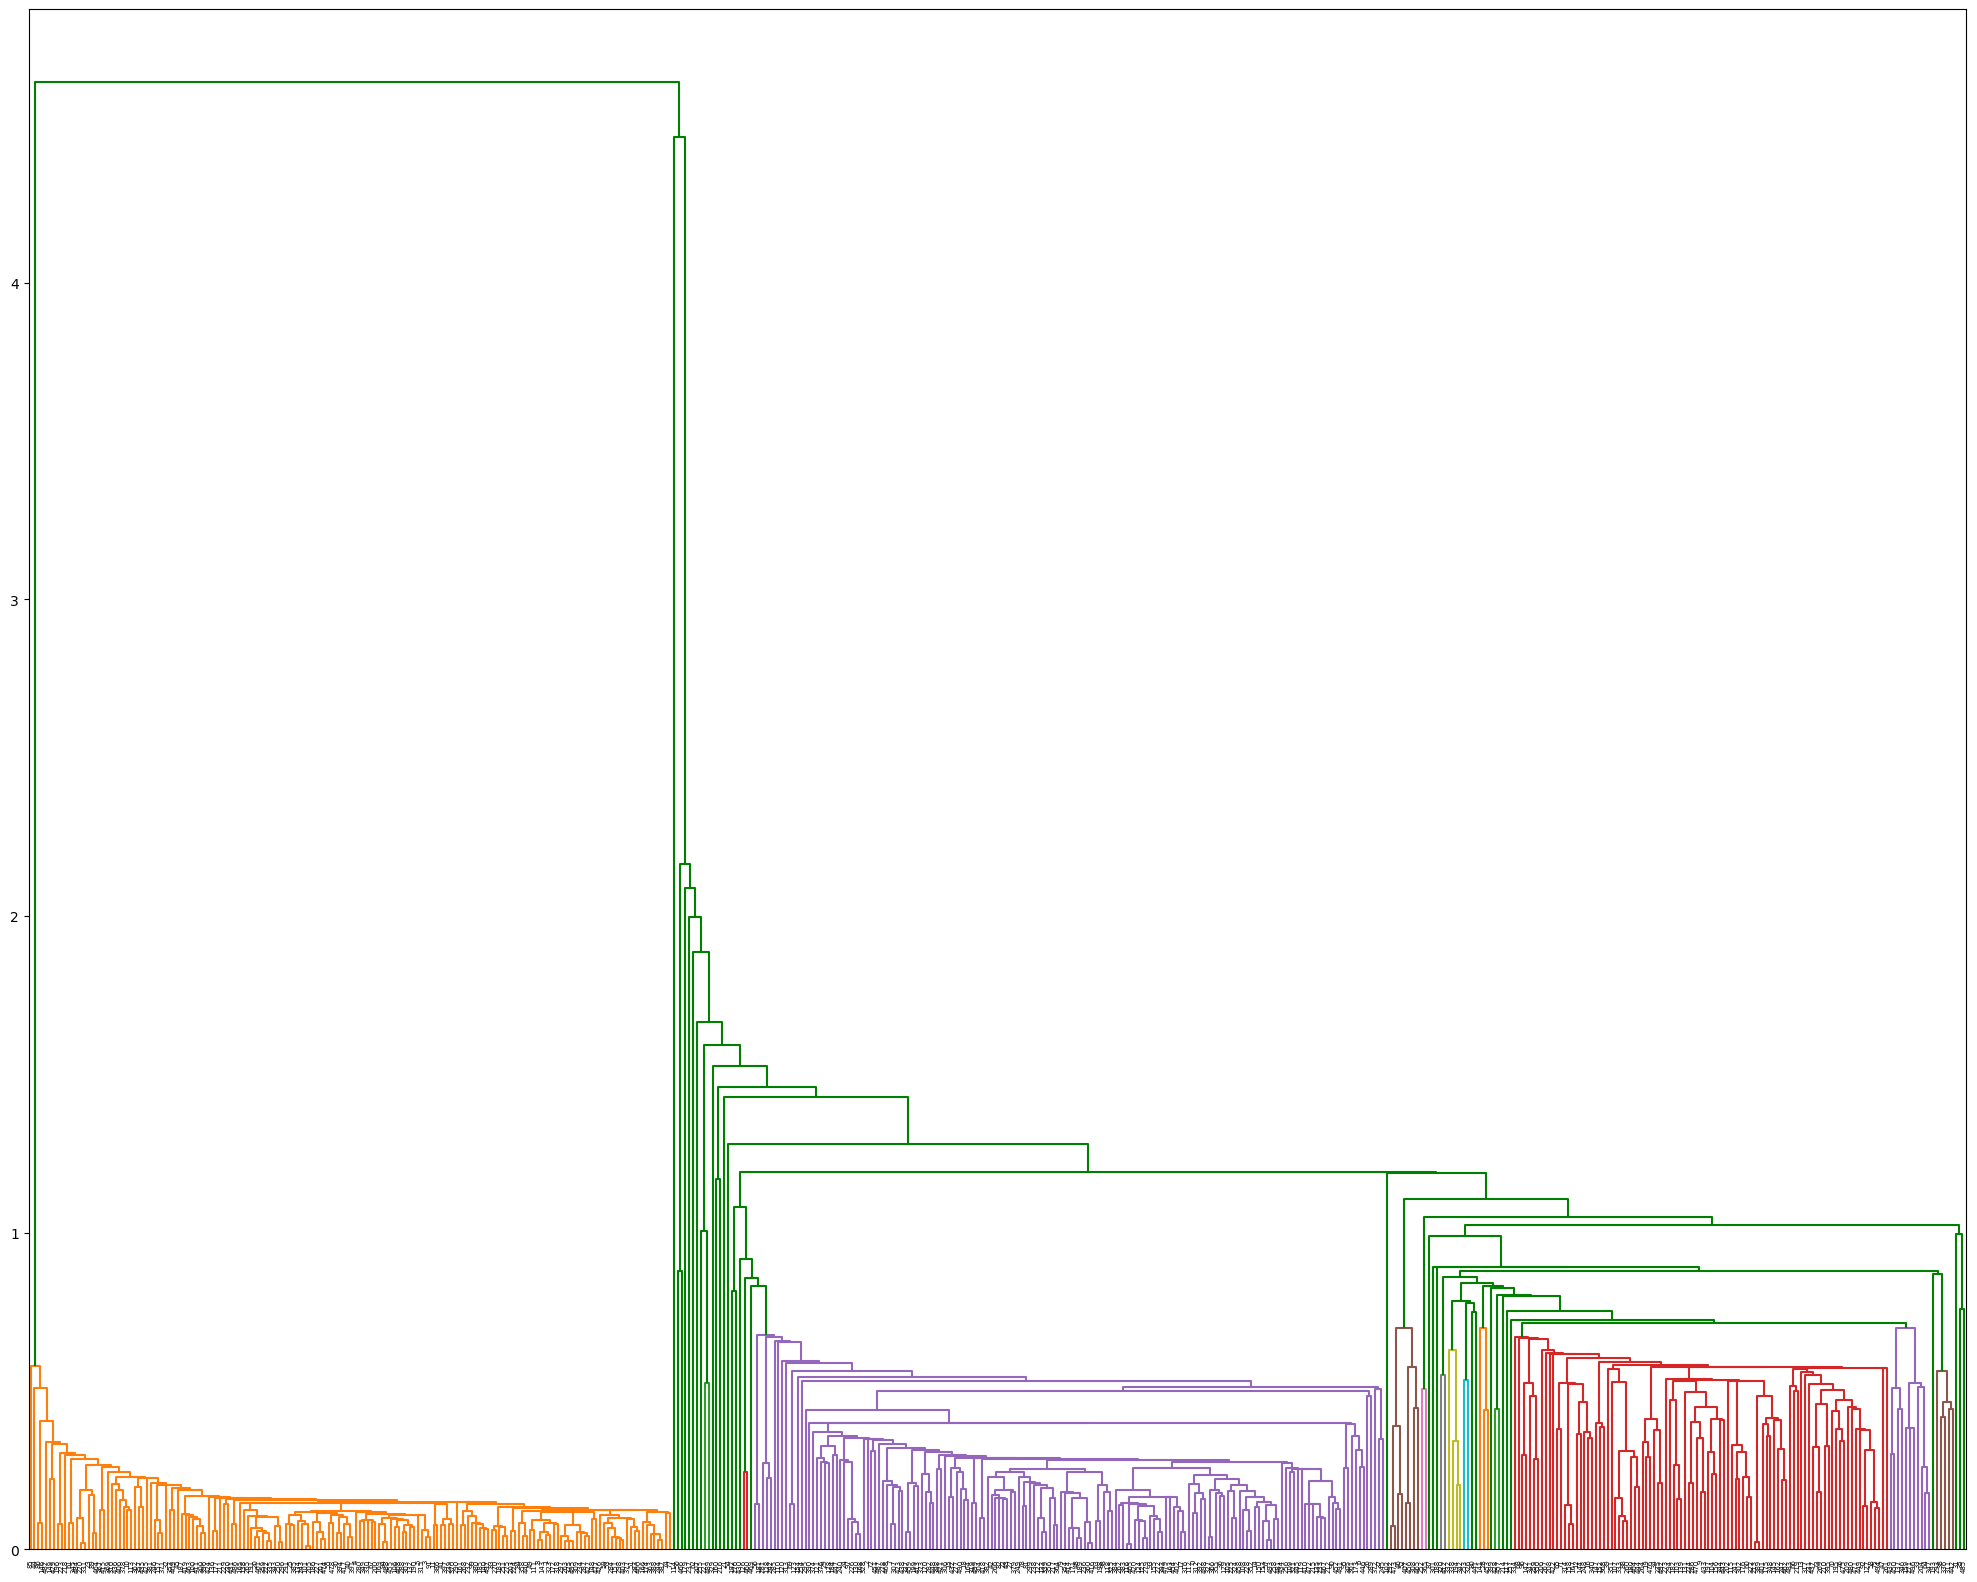

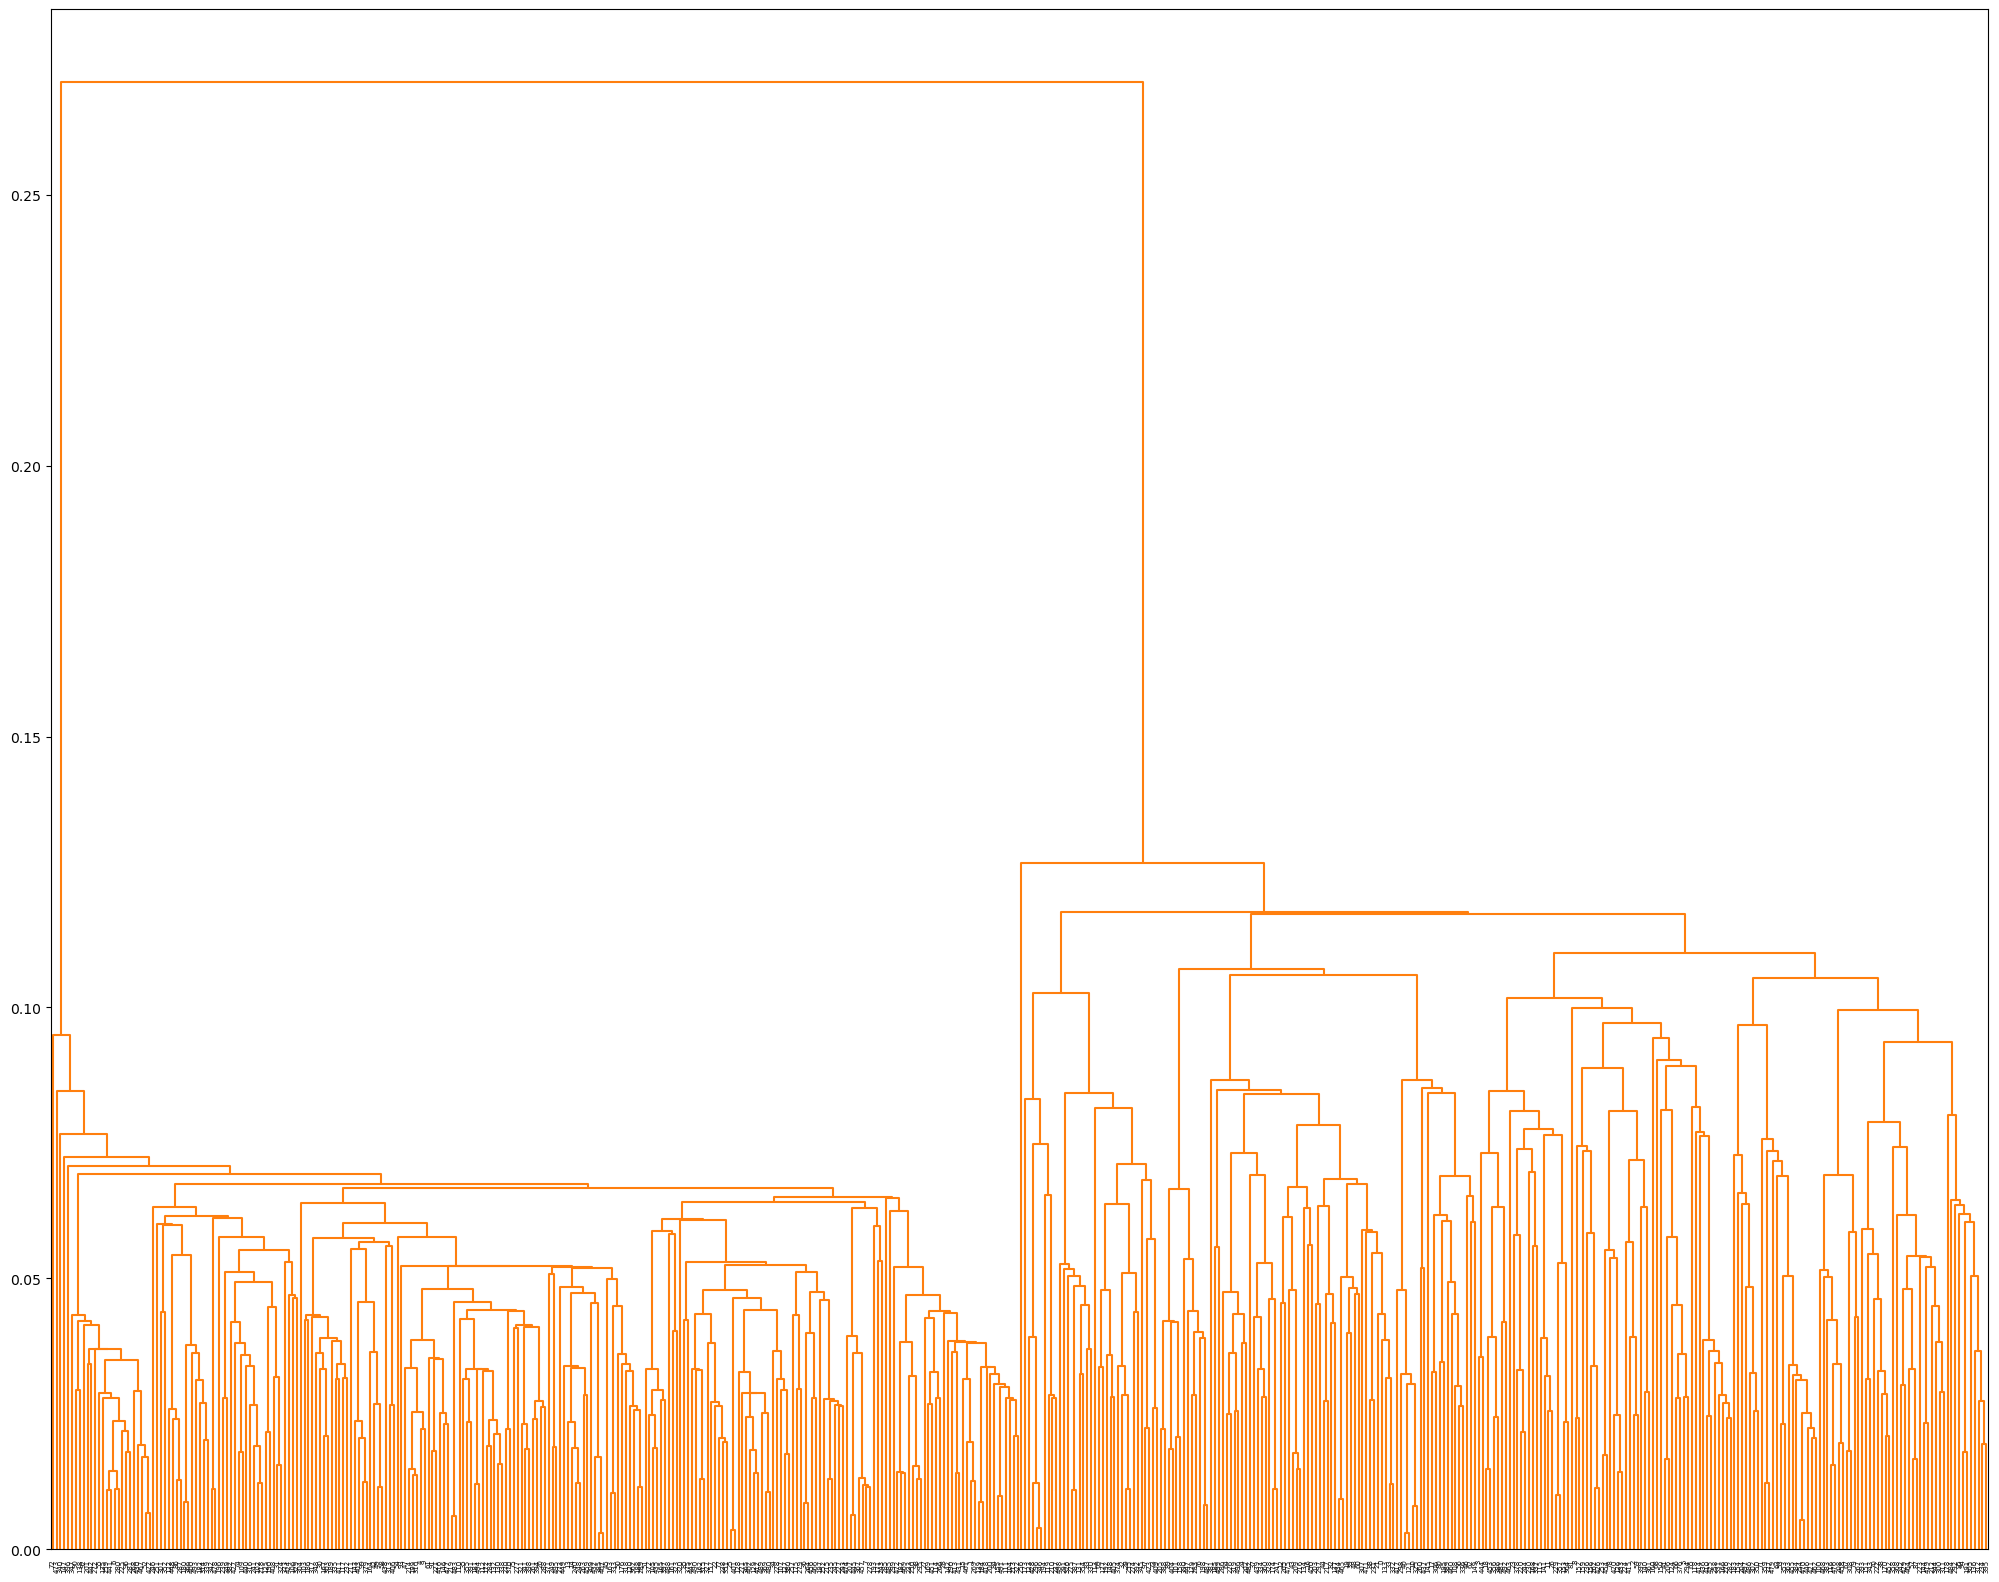

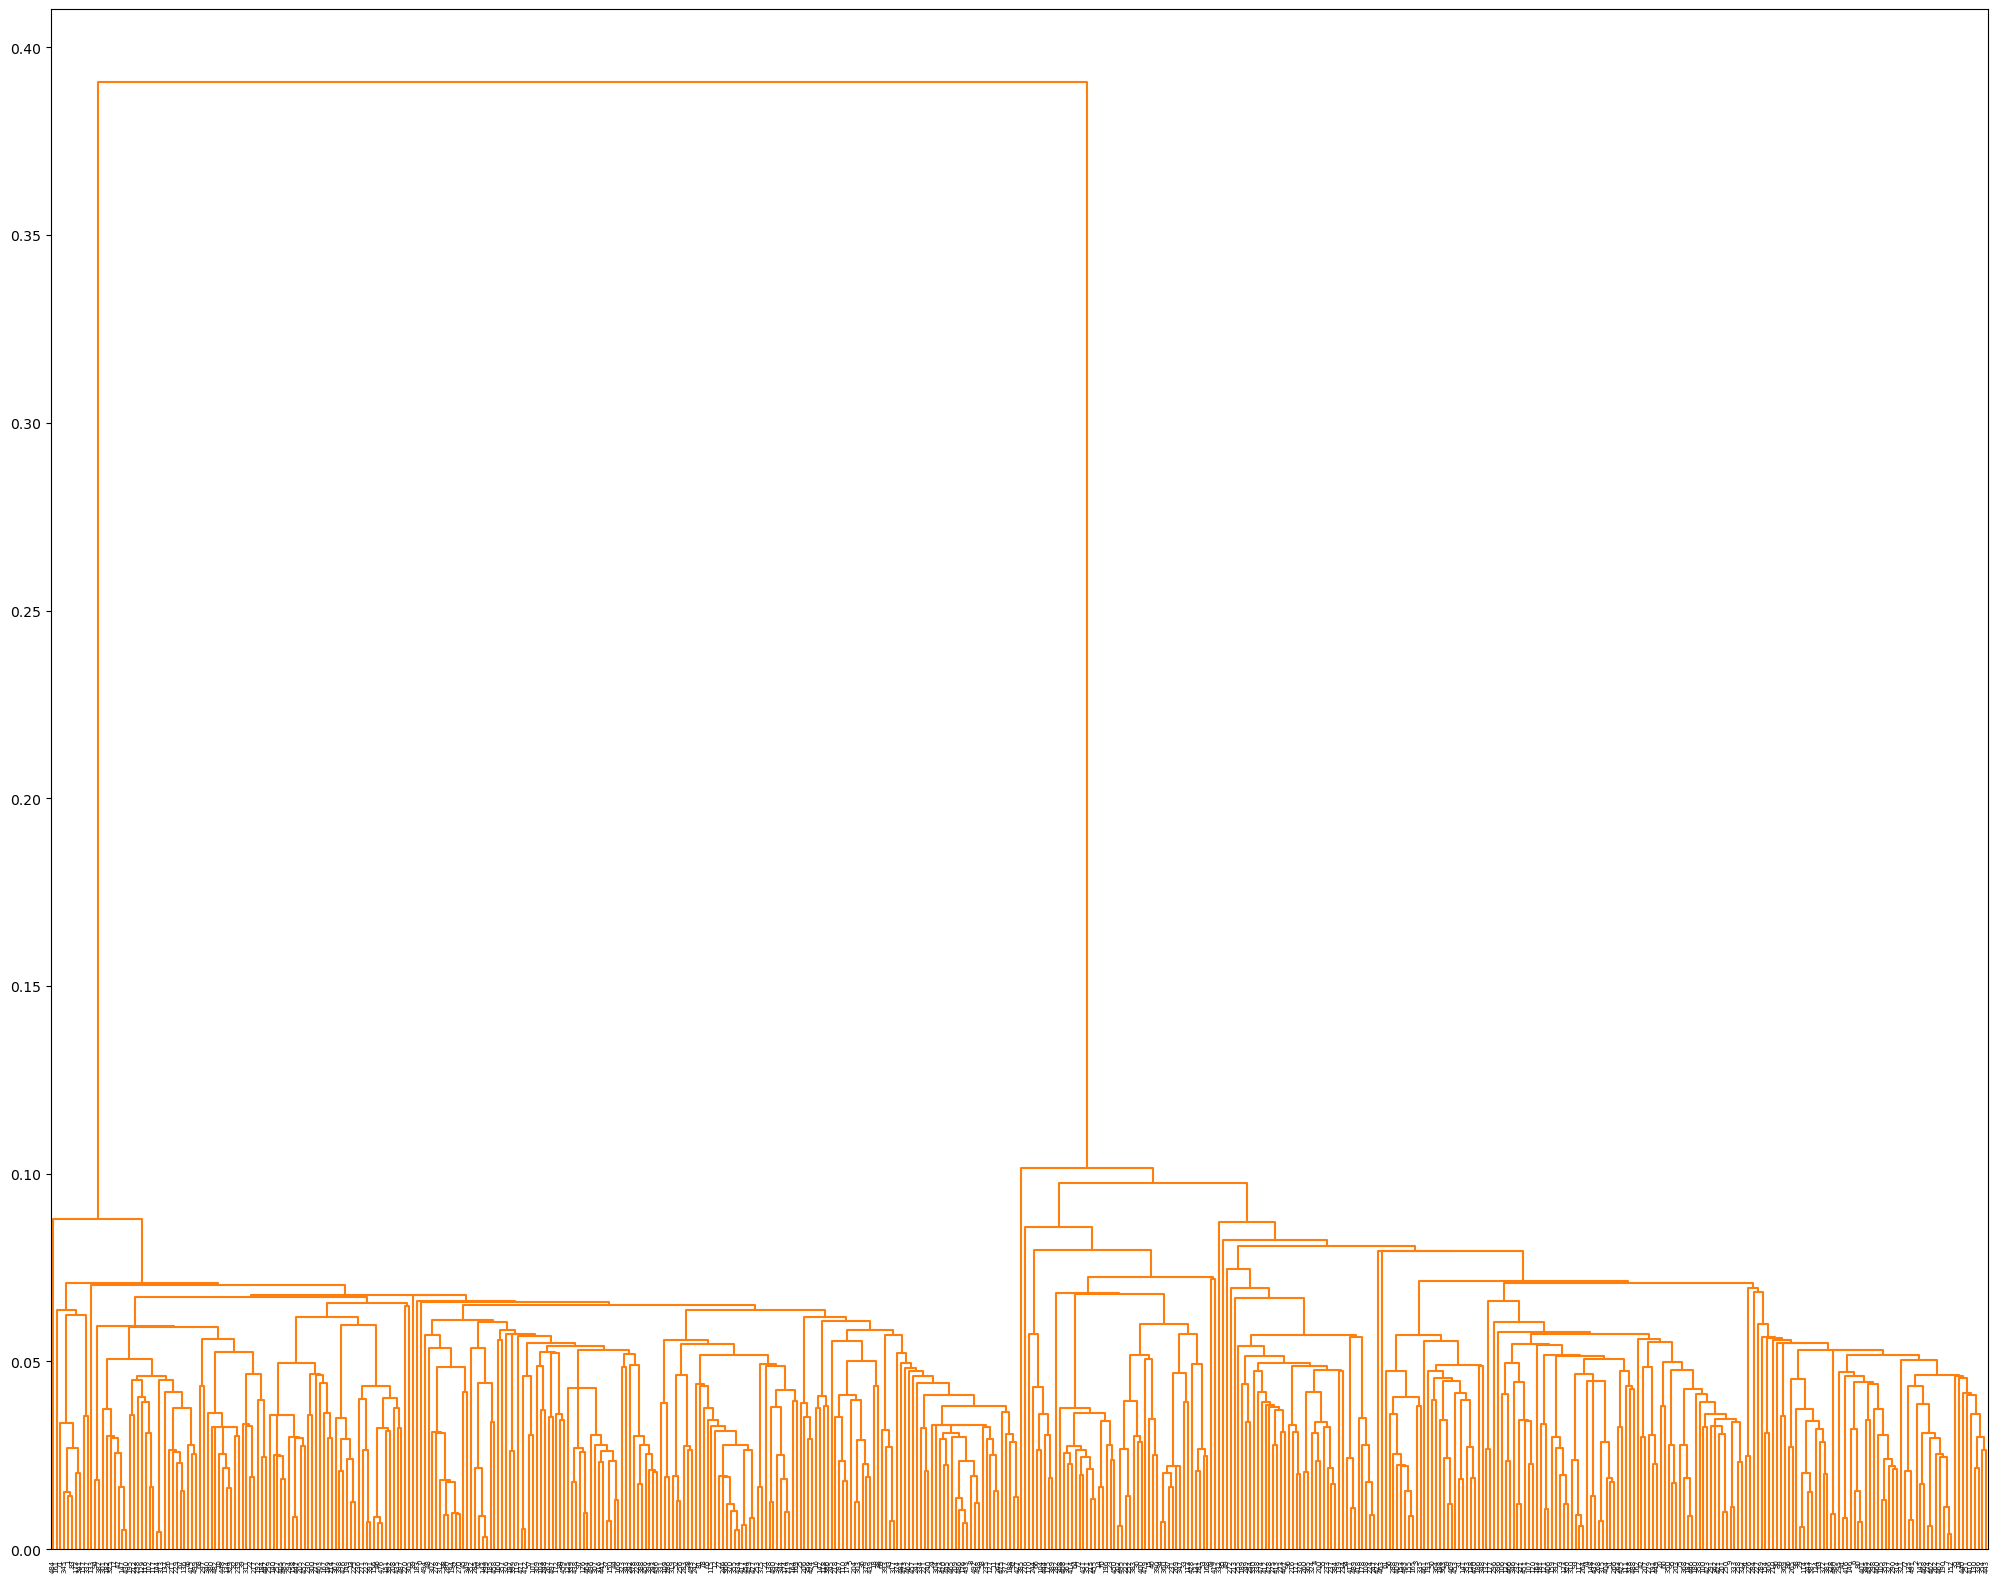

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage

for i in range(1,6):
    data = generate_data(500, i)
    n, m = np.shape(data)
    K = 3

    model = KMeans(n_clusters=K, n_init=20, max_iter=10)
    model.fit(data)

    centers = model.cluster_centers_
    labels = model.labels_

    temp = linkage(data, 'single')


    plt.figure(i)
    dn = dendrogram(temp, above_threshold_color="green", color_threshold=.7)
